In [1]:
import sys, os
sys.path.append(f'../../code')
path_to_json = os.getcwd()

from IPython.display import display, Markdown

In [2]:
import json
def load_case(path):
    display(Markdown(f'## {path}'))
    with open(path, 'r+') as file: bundle = json.load(file)
    print('Temperature:', bundle['temperature'])
    return bundle

display(Markdown('# Files'))
json_files_mc = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('mc-hT')],
                       reverse = True)
json_files_alg1 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('a1-hT')],
                         reverse = True)

json_files_alg2 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('a2-hT')],
                         reverse = True)

print("MC: ", json_files_mc)
print("A1: ", json_files_alg1)
print("A2: ", json_files_alg2)

mc = load_case(json_files_mc[0])
alg1 = load_case(json_files_alg1[0])
alg2 = load_case(json_files_alg2[0])

# Files

MC:  ['mc-hT.json']
A1:  ['a1-hT.json']
A2:  ['a2-hT.json']


## mc-hT.json

Temperature: 5


## a1-hT.json

Temperature: 5


## a2-hT.json

Temperature: 5


Generating theoretical configurations: 100%|█| 16/16 [00:00<00:00, 7965.44it/s]


[Text(0, 3, '25655'), Text(0, 3, '69165'), Text(0, 3, '5180')]

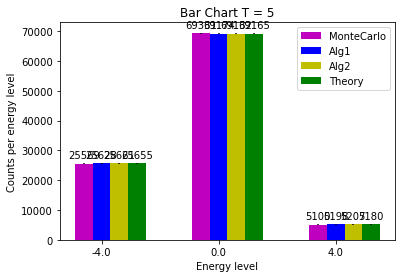

In [3]:
import ising
from ising import *
import matplotlib.pyplot as plt

mc_m_counts = count_variables(mc["magnetization_sample"])
alg1_m_counts = count_variables(alg1["magnetization_sample"])
alg2_m_counts = count_variables(alg2["magnetization_sample"])
mc_engy_counts = count_variables(mc["energy_sample"])
alg1_engy_counts = count_variables(alg1["energy_sample"])
alg2_engy_counts = count_variables(alg2["energy_sample"])

chain = Chain(size=alg1["number of spins"], temperature = alg1["temperature"])
n_samples = len(alg1["energy_sample"])
theory_engy, theory_m = theoretical_distributions(chain)
theory_engy_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_engy)
multiplicity_mc, std_mc, mc_engy_counts = std_algorithms(mc_engy_counts, multinom_avg, theory_engy, multinom_std)
multiplicity_alg1, std_alg1, alg1_engy_counts = std_algorithms(alg1_engy_counts, multinom_avg, theory_engy, multinom_std)
multiplicity_alg2, std_alg2, alg2_engy_counts = std_algorithms(alg2_engy_counts, multinom_avg, theory_engy, multinom_std)

fig, ax = plt.subplots()
labels = mc_engy_counts.keys()
x = np.arange(len(labels)) 
width = 0.15
rects1 = ax.bar(x, list(mc_engy_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_engy_counts.values()), width, yerr=std_alg1, align='center',
                label='Alg1', color='b')
rects3 = ax.bar(x + width * 2, list(alg2_engy_counts.values()), width, yerr=std_alg2, align='center',
                label='Alg2', color='y')

theory_engy_counts_adjusted = [round(counts) for counts in theory_engy_counts]
rects4 = ax.bar(x + width * 3, theory_engy_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

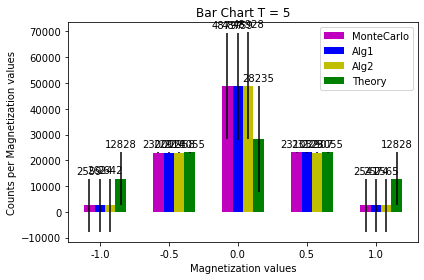

In [4]:
theory_m_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_m)
multiplicity_mc, std_mc, mc_m_counts = std_algorithms(mc_m_counts, multinom_avg, theory_m, multinom_std)
multiplicity_alg1, std_alg1, alg1_m_counts = std_algorithms(alg1_m_counts, multinom_avg, theory_m, multinom_std)
multiplicity_alg2, std_alg2, alg2_m_counts = std_algorithms(alg2_m_counts, multinom_avg, theory_m, multinom_std)

fig, ax = plt.subplots()
labels = mc_m_counts.keys()
x = np.arange(len(labels)) 
width = 0.15
rects1 = ax.bar(x, list(mc_m_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_m_counts.values()), width, yerr=std_alg1, align='center',
                label='Alg1', color='b')
rects3 = ax.bar(x + width * 2, list(alg2_m_counts.values()), width, yerr=std_alg2, align='center',
                label='Alg2', color='y')
theory_m_counts_adjusted = [round(counts) for counts in theory_m_counts]
rects4 = ax.bar(x + width * 3, theory_m_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 5')
ax.set_ylabel('Counts per Magnetization values')
ax.set_xlabel('Magnetization values')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
fig.tight_layout()

Text(0.5, 1.0, 'M Correlation MonteCarlo')

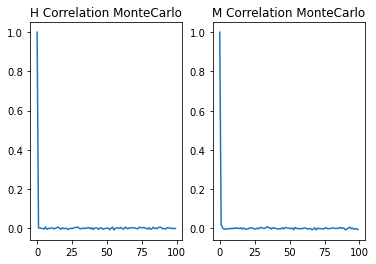

In [5]:
mc_engy_corr = acrl(mc["energy_sample"], 100)
mc_m_corr = acrl(mc["magnetization_sample"], 100)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(mc_engy_corr)
axes[0].set_title("H Correlation MonteCarlo")
axes[1].plot(mc_m_corr)
axes[1].set_title("M Correlation MonteCarlo")

Text(0.5, 1.0, 'M Correlation Alg1')

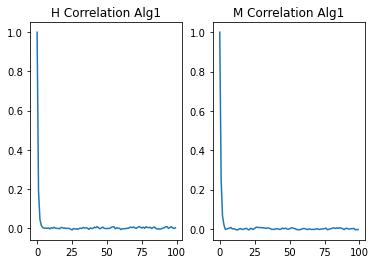

In [6]:
alg1_engy_corr = acrl(alg1["energy_sample"], 100)
alg1_m_corr = acrl(alg1["magnetization_sample"], 100)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg1_engy_corr)
axes[0].set_title("H Correlation Alg1")
axes[1].plot(alg1_m_corr)
axes[1].set_title("M Correlation Alg1")

Text(0.5, 1.0, 'M Correlation Alg2')

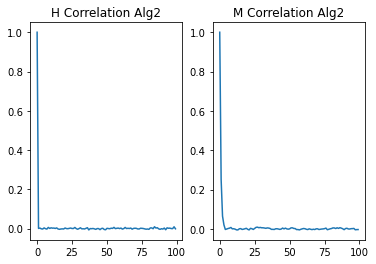

In [7]:
alg2_engy_corr = acrl(alg2["energy_sample"], 100)
alg2_m_corr = acrl(alg1["magnetization_sample"], 100)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg2_engy_corr)
axes[0].set_title("H Correlation Alg2")
axes[1].plot(alg2_m_corr)
axes[1].set_title("M Correlation Alg2")

In [8]:
from statistical_tests import *
display(Markdown("# Chi2 test one sample"))
print(f'H0: the sample comes from the same distribution of the theoretical one')
mc_engy = np.array(list(mc_engy_counts.values()))
alg1_engy = np.array(list(alg1_engy_counts.values()))
alg2_engy = np.array(list(alg2_engy_counts.values()))
mc_m = np.array(list(mc_m_counts.values()))
alg1_m = np.array(list(alg1_m_counts.values()))
alg2_m = np.array(list(alg2_m_counts.values()))
print(f'Energy MC:', one_sample_chi_squared(np.array(theory_engy[:,1]), mc_engy))
print(f'Energy Alg1:', one_sample_chi_squared(np.array(theory_engy[:,1]), alg1_engy))
print(f'Energy Alg2:', one_sample_chi_squared(np.array(theory_engy[:,1]), alg2_engy))
print(f'Energy Multinomial-MC:', one_sample_chi_squared_multinomial(theory_engy[:,1], mc_engy))
print(f'Energy Multinomial-Alg1:', one_sample_chi_squared_multinomial(theory_engy[:,1], alg1_engy))
print(f'Energy Multinomial-Alg2:', one_sample_chi_squared_multinomial(theory_engy[:,1], alg2_engy))
print(f'Magnetization MC:', one_sample_chi_squared(np.array(theory_m[:,1]), mc_m)) 
print(f'Magnetization Alg1:', one_sample_chi_squared(np.array(theory_m[:,1]), alg1_m))
print(f'Magnetization Alg2:', one_sample_chi_squared(np.array(theory_m[:,1]), alg2_m))
print(f'Magnetization Multinomial-MC:', one_sample_chi_squared_multinomial(theory_m[:,1], mc_m))
print(f'Magnetization Multinomial-Alg1:', one_sample_chi_squared_multinomial(theory_m[:,1], alg1_m))
print(f'Magnetization Multinomial-Alg2:', one_sample_chi_squared_multinomial(theory_m[:,1], alg2_m))

# Chi2 test one sample

H0: the sample comes from the same distribution of the theoretical one
Energy MC: 0.3846828840133682
Energy Alg1: 0.95384652581059
Energy Alg2: 0.9223286975774242
Energy Multinomial-MC: 0.377
Energy Multinomial-Alg1: 0.948
Energy Multinomial-Alg2: 0.931
Magnetization MC: 0.0
Magnetization Alg1: 0.0
Magnetization Alg2: 0.0
Magnetization Multinomial-MC: 0.0
Magnetization Multinomial-Alg1: 0.0
Magnetization Multinomial-Alg2: 0.0


In [9]:
from statistical_tests import *
display(Markdown("# Loglikelihood ratio test one sample"))
print(f'H0: the sample comes from the same distribution of the theoretical one')
mc_engy = np.array(list(mc_engy_counts.values()))
alg1_engy = np.array(list(alg1_engy_counts.values()))
alg2_engy = np.array(list(alg2_engy_counts.values()))
mc_m = np.array(list(mc_m_counts.values()))
alg1_m = np.array(list(alg1_m_counts.values()))
alg2_m = np.array(list(alg2_m_counts.values()))
print(f'Energy MC:', one_sample_test(np.array(theory_engy[:,1]), mc_engy))
print(f'Energy Alg1:', one_sample_test(np.array(theory_engy[:,1]), alg1_engy))
print(f'Energy Alg2:', one_sample_test(np.array(theory_engy[:,1]), alg2_engy))
print(f'Magnetization MC:', one_sample_test(np.array(theory_m[:,1]), mc_m)) 
print(f'Magnetization Alg1:', one_sample_test(np.array(theory_m[:,1]), alg1_m))
print(f'Magnetization Alg2:', one_sample_test(np.array(theory_m[:,1]), alg2_m))

# Loglikelihood ratio test one sample

H0: the sample comes from the same distribution of the theoretical one
Energy MC: 0.3834733269635532
Energy Alg1: 0.9538791353068131
Energy Alg2: 0.9224457895389465
Magnetization MC: 0.0
Magnetization Alg1: 0.0
Magnetization Alg2: 0.0


In [10]:
from statistical_tests import two_sample_chi_squared
display(Markdown("# Chi2 test two sample"))
print(f'H0: the two sample comes from the same distribution')
mc_engy = list(mc_engy_counts.values())
alg1_engy = list(alg1_engy_counts.values())
mc_m = list(mc_m_counts.values())
alg1_m = list(alg1_m_counts.values())
print("MC - Alg1")
print(f'Energy :', two_sample_chi_squared(mc_engy, alg1_engy))
print(f'Magnetization :', two_sample_chi_squared(mc_m, alg1_m))
print("MC-Alg2")
print(f'Energy :', two_sample_chi_squared(mc_engy, alg2_engy))
print(f'Magnetization :', two_sample_chi_squared(mc_m, alg2_m))

# Chi2 test two sample

H0: the two sample comes from the same distribution
MC - Alg1
Energy : 0.30501249621089105
Magnetization : 0.6518080514722384
MC-Alg2
Energy : 0.4579436250557928
Magnetization : 0.6470909745894667


In [11]:
from statistical_tests import *
display(Markdown("# LR test two sample"))
print(f'H0: the two sample comes from the same distribution')
mc_engy = np.array(list(mc_engy_counts.values()))
alg1_engy = np.array(list(alg1_engy_counts.values()))
alg2_engy = np.array(list(alg2_engy_counts.values()))
mc_m = np.array(list(mc_m_counts.values()))
alg1_m = np.array(list(alg1_m_counts.values()))
alg2_m = np.array(list(alg2_m_counts.values()))
print(f'MC-Alg1')
print(f'Energy :', two_samples_test(mc_engy, alg1_engy))
print(f'Magnetization :', two_samples_test(mc_m, alg1_m))
print(f'MC-Alg2')
print(f'Energy :', two_samples_test(mc_engy, alg2_engy))
print(f'Magnetization :', two_samples_test(mc_m, alg2_m))

# LR test two sample

H0: the two sample comes from the same distribution
MC-Alg1
Energy : 0.005772207889761647
Magnetization : 0.0005398386725939717
MC-Alg2
Energy : 0.005770484041878846
Magnetization : 0.0005399016448628845
